In [10]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 189 kB 28.2 MB/s 
     |████████████████████████████████| 23.2 MB 2.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [1]:
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0    99.827251
1     0.172749
Name: Class, dtype: float64


Counter({0: 29, 1: 530})

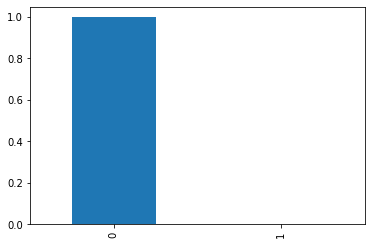

In [29]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/4-2/capstone2/creditcard.csv')
df.Class.value_counts(normalize=True).plot(kind='bar')
print(df.Class.value_counts(normalize=True)*100)
import numpy as np
from sklearn.datasets import fetch_lfw_people

data = fetch_lfw_people()
george_bush_id = 1871  # Photos of George W. Bush
bill_clinton_id = 531  # Photos of Bill Clinton
classes = [george_bush_id, bill_clinton_id]
classes_name = np.array(["B. Clinton", "G.W. Bush"], dtype=np.object)
mask_photos = np.isin(data.target, classes)
X, y = data.data[mask_photos], data.target[mask_photos]
y = (y == george_bush_id).astype(np.int8)
Counter(y)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from collections import Counter
from matplotlib import pyplot
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)
#모델링
def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)
#평가 지표
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred, average='macro')
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('정확도 : {0:.6f}, 정밀도 : {1:.6f}, 재현율 : {2:.6f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.6f}, auc : {1:.6f}'.format(f1,roc_score,recall))


In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
modeling(lr,X_train,X_test,y_train,y_test)

정확도 : 0.978571, 정밀도 : 0.978102, 재현율 : 1.000000
f1-score : 0.827798, auc : 0.750000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [28]:
from imblearn.over_sampling import SMOTE 
from collections import Counter
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(Counter(y_res))
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.25,random_state=10)
modeling(lr, X_train,X_test,y_train,y_test)

Counter({1: 530, 0: 530})
정확도 : 0.996226, 정밀도 : 1.000000, 재현율 : 0.992366
f1-score : 0.996226, auc : 0.996183


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [32]:
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
lr = LogisticRegression(max_iter=10000)
border_sm = BorderlineSMOTE(
    sampling_strategy=0.5, 
    random_state=42)
a = ADASYN(random_state=42)

X_border_A1, y_border_A1 = border_sm.fit_resample(X, y)
X_border_A2, y_border_A2 = a.fit_resample(X_border_A1, y_border_A1)

X_train, X_test, y_train, y_test = train_test_split(X_border_A2, y_border_A2,test_size=0.25,random_state=10)
print('border_a')
modeling(lr, X_train,X_test,y_train,y_test)



border_sm = BorderlineSMOTE(random_state=42)
a = ADASYN(sampling_strategy=0.5, random_state=42)
X_res, y_res = a.fit_resample(X, y)
X_a_border, y_a_border = border_sm.fit_resample(X_res, y_res)

print('a_border')
X_train, X_test, y_train, y_test = train_test_split(X_a_border, y_a_border,test_size=0.25,random_state=10)
modeling(lr, X_train,X_test,y_train,y_test)

border_a
정확도 : 0.996241, 정밀도 : 1.000000, 재현율 : 0.992593
f1-score : 0.996240, auc : 0.996296
a_border
정확도 : 0.994924, 정밀도 : 1.000000, 재현율 : 0.992308
f1-score : 0.994366, auc : 0.996154
